In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [4]:
import csv
import matplotlib.pyplot as plt

## Real or Fake News Classifier

In [5]:
fake_docs = []
real_docs = []
with open('train/fake_or_real/fake.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        fake_docs.append(line[0])
with open('train/fake_or_real/real.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        real_docs.append(line[0])

Balanced dataset, baseline ~50%

In [6]:
print(len(fake_docs))

20000


In [7]:
print(len(real_docs))

20000


**Separate training set, validation set and test set**

In [8]:
train_docs = fake_docs[:12000] + real_docs[:12000]
val_docs = fake_docs[12000:16000] + real_docs[12000:16000]
test_docs = fake_docs[16000:] + real_docs[16000:]

**Prepare labels**  
0: Fake news, 1: Real news

In [9]:
train_labels = array([0] * 12000 + [1] * 12000)
val_labels = array([0] * 4000 + [1] * 4000)
test_labels = array([0] * 4000 + [1] * 4000)

#### Now encode documents using one hot encoding

In [10]:
max_feature = 10000
train_data = [one_hot(d, max_feature) for d in train_docs]
val_data = [one_hot(d, max_feature) for d in val_docs]
test_data = [one_hot(d, max_feature) for d in test_docs]

take a look at data

In [11]:
print(train_data[:2])

[[8960, 4417, 9864, 4846, 8579, 5146, 3813, 741, 6576, 9410, 7570, 8954, 8960, 4417, 4835, 9552, 6689, 7579, 1750, 9467, 1519, 9610, 5146, 6646, 5718, 5187, 7377, 9029, 2468, 2955, 6661, 2210, 7839, 3544, 1519, 7672, 4846, 7839, 4059, 8285, 8325, 5718, 8874, 7977, 7267, 4867, 7247, 1880, 8874, 5607, 5089, 9654, 1937, 2210, 4835, 8245, 9063, 7839, 9416, 5718, 6661, 9552, 6689, 9416, 7377, 2395, 6654, 7360, 26, 3758, 6525, 5718, 6672, 6330, 1178, 7839, 7579, 1750, 5544, 1572, 2124, 735, 8285, 8325, 5718, 515, 8874, 7977, 7267, 4867, 7247, 1880, 1519, 9610, 5718, 667, 5146, 6646, 8400, 9343, 2705, 8749, 8796, 5143, 1519, 8031, 6646, 6405, 7434, 2395, 6654, 7360, 26, 3758, 6525, 5718, 6672, 6330, 1178, 7839, 7579, 1750, 5544, 1572, 2124, 735, 8285, 8325, 5718, 515, 8874, 7977, 7267, 4867, 7247, 1880, 1519, 9610, 5718, 667, 5146, 6646, 8796, 5143, 1519, 8031, 6646, 6405, 7434, 8960, 721, 4417, 7791, 746, 4417, 203, 6059, 3021, 319, 2471, 2395, 8274, 2395, 3433, 731, 5023, 3274, 6670, 5544, 

In [12]:
# Cut document after 500 words
max_len = 500
train_data = pad_sequences(train_data, maxlen=max_len, padding='post')
val_data = pad_sequences(val_data, maxlen=max_len, padding='post')
test_data = pad_sequences(test_data, maxlen=max_len, padding='post')

In [13]:
train_data.shape

(24000, 500)

## Start training

In [14]:
from keras.layers import LSTM

In [22]:
model = Sequential()
model.add(Embedding(max_feature, 64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_data=(val_data, val_labels))

2021-11-27 00:03:39.953792: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
188/188 [==============================] - 69s 356ms/step - loss: 0.3342 - acc: 0.8649 - val_loss: 0.3056 - val_acc: 0.9087
Epoch 2/10
188/188 [==============================] - 67s 357ms/step - loss: 0.1077 - acc: 0.9754 - val_loss: 0.3224 - val_acc: 0.9144
Epoch 3/10
188/188 [==============================] - 66s 353ms/step - loss: 0.0841 - acc: 0.9822 - val_loss: 0.3228 - val_acc: 0.9165
Epoch 4/10
188/188 [==============================] - 67s 355ms/step - loss: 0.0838 - acc: 0.9815 - val_loss: 0.4208 - val_acc: 0.8700
Epoch 5/10
188/188 [==============================] - 65s 346ms/step - loss: 0.0828 - acc: 0.9808 - val_loss: 0.3872 - val_acc: 0.8964
Epoch 6/10
188/188 [==============================] - 66s 351ms/step - loss: 0.0975 - acc: 0.9763 - val_loss: 0.4319 - val_acc: 0.8860
Epoch 7/10
188/188 [==============================] - 67s 356ms/step - loss: 0.0906 - acc: 0.9790 - val_loss: 0.3654 - val_acc: 0.8855
Epoch 8/10
188/188 [==============================] - 6

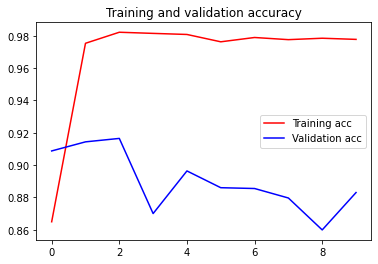

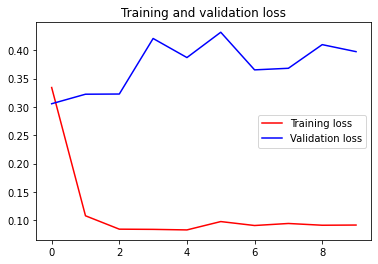

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model = Sequential()
model.add(Embedding(max_feature, 64))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_data=(val_data, val_labels))

Epoch 1/10
188/188 [==============================] - 102s 529ms/step - loss: 0.3395 - acc: 0.8566 - val_loss: 0.6377 - val_acc: 0.5861
Epoch 2/10
188/188 [==============================] - 99s 528ms/step - loss: 0.1351 - acc: 0.9549 - val_loss: 0.4057 - val_acc: 0.8907
Epoch 3/10
188/188 [==============================] - 99s 527ms/step - loss: 0.0985 - acc: 0.9789 - val_loss: 0.4053 - val_acc: 0.8917
Epoch 4/10
188/188 [==============================] - 98s 521ms/step - loss: 0.1003 - acc: 0.9773 - val_loss: 0.4308 - val_acc: 0.8815
Epoch 5/10
188/188 [==============================] - 98s 523ms/step - loss: 0.0886 - acc: 0.9801 - val_loss: 0.3221 - val_acc: 0.9128
Epoch 6/10
188/188 [==============================] - 99s 525ms/step - loss: 0.0878 - acc: 0.9808 - val_loss: 0.4329 - val_acc: 0.8860
Epoch 7/10
188/188 [==============================] - 2911s 16s/step - loss: 0.0890 - acc: 0.9807 - val_loss: 0.3547 - val_acc: 0.9057
Epoch 8/10
188/188 [==============================] - 

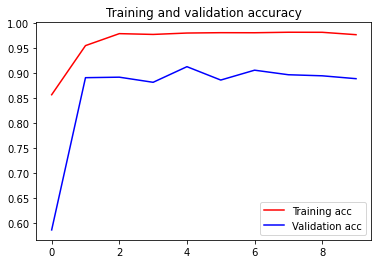

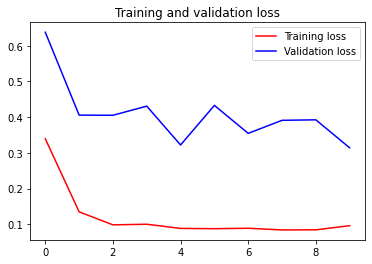

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model = Sequential()
model.add(Embedding(max_feature, 64))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=128,
                    validation_data=(val_data, val_labels))

2021-12-05 15:28:02.887799: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-05 15:28:03.563946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
188/188 [==============================] - 117s 608ms/step - loss: 0.3882 - acc: 0.7987 - val_loss: 0.2746 - val_acc: 0.9237
Epoch 2/20
188/188 [==============================] - 177s 941ms/step - loss: 0.1261 - acc: 0.9706 - val_loss: 0.2555 - val_acc: 0.9294
Epoch 3/20
188/188 [==============================] - 134s 715ms/step - loss: 0.0964 - acc: 0.9792 - val_loss: 0.2821 - val_acc: 0.9185
Epoch 4/20
188/188 [==============================] - 125s 667ms/step - loss: 0.0803 - acc: 0.9833 - val_loss: 0.3307 - val_acc: 0.9154
Epoch 5/20
188/188 [==============================] - 126s 668ms/step - loss: 0.0839 - acc: 0.9818 - val_loss: 0.3399 - val_acc: 0.9107
Epoch 6/20
188/188 [==============================] - 130s 690ms/step - loss: 0.0901 - acc: 0.9803 - val_loss: 0.4465 - val_acc: 0.8921
Epoch 7/20
188/188 [==============================] - 121s 643ms/step - loss: 0.1225 - acc: 0.9679 - val_loss: 0.3625 - val_acc: 0.8939
Epoch 8/20
188/188 [============================

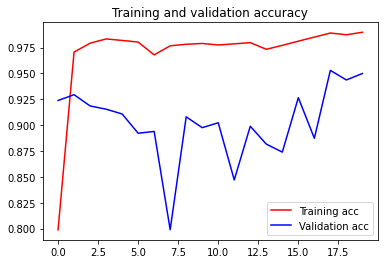

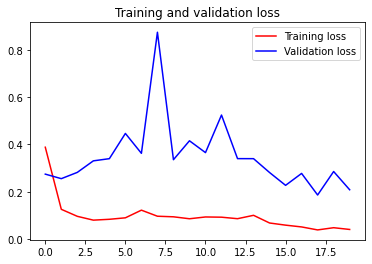

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Use this model to evaluate test data

In [19]:
results = model.evaluate(test_data, test_labels)

250/250 [==============================] - 11s 44ms/step - loss: 0.2058 - acc: 0.9492


## Prepare unseen news data

In [11]:
news = []
# Read the cleaned news dataset into a list
with open('train/news.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        news.append(line[0])
print(len(news))

20000


In [21]:
print(news[0])

ad sales boost time warner profit quarterly profits at us media giant timewarner jumped to bn £ m for the three months to december from m year earlier the firm which is now one of the biggest investors in google benefited from sales of high speed internet connections and higher advert sales timewarner said fourth quarter sales rose to bn from bn its profits were buoyed by one off gains which offset a profit dip at warner bros and less users for aol time warner said on friday that it now owns of search engine google but its own internet business aol had has mixed fortunes it lost subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aol s underlying profit before exceptional items rose on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol s existing customers for high speed broadband timewarner also

In [22]:
news_data = [one_hot(d, max_feature) for d in news]

In [23]:
# Cut document after 500 words
max_len = 500
news_data = pad_sequences(news_data, maxlen=max_len, padding='post')

In [24]:
news_data.shape

(20000, 500)

In [25]:
news_pred = model.predict(news_data)

In [26]:
news_pred[:5]

array([[0.99264705],
       [0.9926475 ],
       [0.9926475 ],
       [0.99264765],
       [0.9926475 ]], dtype=float32)

In [27]:
fake = 0
real = 0
# Neutral
na = 0

In [28]:
news_pred.shape

(20000, 1)

#### According to the fake/real news classifier trained above, what's the proportion of fake, real, neutral news?

I chose to have confidence between 0.4 ~ 0.6 as neutral news

In [29]:
for pred in news_pred:
    if pred <= 0.3:
        fake += 1
    elif pred >= 0.7:
        real += 1
    else:
        na += 1
print("Predicted fake news: " + str(fake), "out of 20000")
print("Predicted real news: " + str(real), "out of 20000")
print("Predicted neutral news: " + str(na), "out of 20000")

Predicted fake news: 6497 out of 20000
Predicted real news: 12909 out of 20000
Predicted neutral news: 594 out of 20000


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


## Prepare hand-coded ally countries and opponent countries

In [24]:
allies, opponents = set(), set()
allies.add('u s')
allies.add('united states')
allies.add('american')
allies.add('united kingdom')
allies.add('great britain')
allies.add('british')
allies.add('u k')
allies.add('japan')
allies.add('australia')

opponents.add('china')
opponents.add('chinese')
opponents.add('russia')
opponents.add('iraq')
opponents.add('pakistan')
opponents.add('kazakhstan')
opponents.add('syria')
opponents.add('iran')

print(allies)
print(opponents)

{'united kingdom', 'united states', 'great britain', 'u k', 'japan', 'australia', 'u s', 'american', 'british'}
{'china', 'russia', 'pakistan', 'iraq', 'syria', 'iran', 'kazakhstan', 'chinese'}


#### Among the predicted fake / real / neutral news, how often are these countries mentioned respectively?

In [56]:
import collections

fake_news_mentions = collections.defaultdict(lambda:0)
real_news_mentions = collections.defaultdict(lambda:0)
neutral_news_mentions = collections.defaultdict(lambda:0)

for idx in range(len(news_pred)):
    ally_mentioned = 0
    opponent_mentioned = 0
    
    for a in allies:
        if news[idx].find(a) != -1:
            ally_mentioned = 1
            break
    for o in opponents:
        if news[idx].find(o) != -1:
            opponent_mentioned = 1
            break
    total = 0
    total += ally_mentioned + opponent_mentioned
    key = ''
    if total == 2:
        key = 'both'
    elif total == 0:
        continue
    else:
        if ally_mentioned == 1:
            key = 'ally'
        else:
            key = 'opponent'
    
    if news_pred[idx] <= 0.3:
        fake_news_mentions[key] += 1
    elif news_pred[idx] >= 0.7:
        real_news_mentions[key] += 1
    else:
        neutral_news_mentions[key] += 1

In [57]:
print(f"Out of {fake} predicted fake news,\n\
    {round(fake_news_mentions['both'] * 100 / fake, 2)}% mentioned both allied and opponent countires,\n\
    {round(fake_news_mentions['ally'] * 100 / fake, 2)}% mentioned only allied country(ies),\n\
    {round(fake_news_mentions['opponent'] * 100 / fake, 2)}% mentioned only opponent country(ies)")
print(f"Out of {real} predicted real news,\n\
    {round(real_news_mentions['both'] * 100 / real, 2)}% mentioned both allied and opponent countires,\n\
    {round(real_news_mentions['ally'] * 100 / real, 2)}% mentioned only allied country(ies),\n\
    {round(real_news_mentions['opponent'] * 100 / real, 2)}% mentioned only opponent country(ies)")
print(f"Out of {na} predicted neutral news,\n\
    {round(neutral_news_mentions['both'] * 100 / na, 2)}% mentioned both allied and opponent countires,\n\
    {round(neutral_news_mentions['ally'] * 100 / na, 2)}% mentioned only allied country(ies),\n\
    {round(neutral_news_mentions['opponent'] * 100 / na, 2)}% mentioned only opponent country(ies)")

Out of 6497 predicted fake news,
    12.16% mentioned both allied and opponent countires,
    43.79% mentioned only allied country(ies),
    4.28% mentioned only opponent country(ies)
Out of 12909 predicted real news,
    22.69% mentioned both allied and opponent countires,
    44.63% mentioned only allied country(ies),
    5.21% mentioned only opponent country(ies)
Out of 594 predicted neutral news,
    24.07% mentioned both allied and opponent countires,
    43.27% mentioned only allied country(ies),
    5.72% mentioned only opponent country(ies)


## News Sentiment Analysis

In this dataset, there are three classes: positive, negative and neutral

In [82]:
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from keras import Input

In [83]:
train_data = []
train_labels = []
with open('train/newsSentiments.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        train_data.append(line[0])
        train_labels.append(line[1])
train_data = np.asarray(train_data)

#### Exploring TextVectorization instead of one hot encoding to preserve more sequential sentiments

In [84]:
max_features = 8000

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=200,
    ngrams=3)

vectorize_layer.adapt(train_data)

In [85]:
text_input = Input(shape=(1,), dtype=tf.string, name='text')

output = vectorize_layer(text_input)
model = tf.keras.Model(text_input, output)

Now we have vectorized data for our training set

In [88]:
vec = model.predict(train_data)

array([[1700,    1,    1, ..., 5224, 3044,    1],
       [  22,    1,    3, ...,  571, 2216,    3],
       [1649, 3906, 4052, ...,   28,   89,  367],
       ...,
       [ 176,    1,  626, ...,    0,    0,    0],
       [3011,  781, 1796, ...,    0,    0,    0],
       [ 452,  797, 1495, ...,    0,    0,    0]])

#### However, the sample size is very small, as also mentioned in _ProcessNewsSentimentsDataset.ipynb_, the financial news I gathered was unusable

In [89]:
vec.shape

(3477, 200)

In [90]:
len(train_data)

3477

#### So I oversampled the original data

In [60]:
from imblearn.over_sampling import SMOTE

In [127]:
smt = SMOTE(sampling_strategy={"pos":3000, "neg":3000, "neut":3000}, random_state=10, k_neighbors=6, n_jobs=3)
train_resampled, train_label_resampled = smt.fit_resample(vec, train_labels)

/usr/local/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (3000) in class pos will be larger than the number of samples in the majority class (class #pos -> 1203)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (3000) in class neg will be larger than the number of samples in the majority class (class #pos -> 1203)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (3000) in class neut will be larger than the number of samples in the majority class (class #pos -> 1203)
  warnings.warn(


In [128]:
train_resampled.shape

(9000, 200)

Now each class has 3000 samples

In [129]:
pos, neg, neutr = 0, 0, 0
for item in train_label_resampled:
    if item == 'pos':
        pos += 1
    elif item == 'neg':
        neg += 1
    else:
        neutr += 1
print(pos, neg, neutr)

3000 3000 3000


Prep the data and labels into different forms for future use

In [130]:
num_train_labels = []
for item in train_label_resampled:
    if item == 'pos':
        num_train_labels.append(1.0)
    elif item == 'neg':
         num_train_labels.append(0.0)
    else:
        num_train_labels.append(0.5)

In [132]:
neg_set = []
pos_set = []
netr_set = []

neg_set_label = []
pos_set_label = []
netr_set_label = []

train_aslist = train_resampled.tolist()
for idx, val in enumerate(num_train_labels):
    if val == 1.0:
        pos_set.append(train_aslist[idx])
        pos_set_label.append(val)
    elif val == 0.0:
        neg_set.append(train_aslist[idx])
        neg_set_label.append(val)
    else:
        netr_set.append(train_aslist[idx])
        netr_set_label.append(val)

In [133]:
neg_set = np.asarray(neg_set)
neg_set.shape

(3000, 200)

In [134]:
pos_set = np.asarray(pos_set)
pos_set.shape

(3000, 200)

In [135]:
netr_set = np.asarray(netr_set)
netr_set.shape

(3000, 200)

## Training with RandomForest

From my final project in another course, I noticed that **RandomForest** gives a really good performance, almost comparable to RNN, while I didn't have a chance to futher explore RandomForest in the other project, I decided to play with it here.

In [139]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

Using k-fold evaluation since I have a relevantly small data size

In [140]:
def KFold_eval_improved(clf, X, y, k):
    train_pred = cross_val_predict(clf, X, y, cv=k)
    
    print('===\tClassification Report\t===')
    print(classification_report(y, train_pred))
    
    cm = confusion_matrix(y, train_pred).ravel()
    print('===\tConfusion Matrix\t===')
    print(cm)

100 trees, verbosity 1, use ALL workers, maximum depth 10 -- Accuracy 0.65, Macro-average Precision, Reall, F1 0.65

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_model = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100,verbose=1, n_jobs=-1, max_depth=10))
])
# 5 fold
KFold_eval_improved(rf_model, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]:

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.59      0.62      0.60      3000
        neut       0.57      0.73      0.64      3000
         pos       0.89      0.62      0.73      3000

    accuracy                           0.65      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.69      0.65      0.66      9000

===	Confusion Matrix	===
[1848  931  221  810 2190    0  456  693 1851]


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Increasing maximum depth to 20 -- Accuracy 0.77, Macro-average Precision, Reall, F1 0.77

In [143]:
rf_model_1 = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100,verbose=1, n_jobs=-1, max_depth=20))
])

KFold_eval_improved(rf_model_1, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]:

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.71      0.78      0.74      3000
        neut       0.73      0.81      0.77      3000
         pos       0.90      0.71      0.79      3000

    accuracy                           0.77      9000
   macro avg       0.78      0.77      0.77      9000
weighted avg       0.78      0.77      0.77      9000

===	Confusion Matrix	===
[2330  459  211  541 2433   26  420  458 2122]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Increasing maximum depth to 30 -- Accuracy 0.80, Macro-average Precision, Reall, F1 0.80

In [144]:
rf_model_2 = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100,verbose=1, n_jobs=-1, max_depth=30))
])

KFold_eval_improved(rf_model_2, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]:

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.75      0.79      0.77      3000
        neut       0.76      0.84      0.80      3000
         pos       0.90      0.76      0.82      3000

    accuracy                           0.80      9000
   macro avg       0.80      0.80      0.80      9000
weighted avg       0.80      0.80      0.80      9000

===	Confusion Matrix	===
[2367  407  226  448 2511   41  334  380 2286]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Trying 6-fold evaluation, same result

In [145]:
KFold_eval_improved(rf_model_2, train_resampled, train_label_resampled, 6)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]:

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.76      0.78      0.77      3000
        neut       0.76      0.84      0.80      3000
         pos       0.89      0.77      0.83      3000

    accuracy                           0.80      9000
   macro avg       0.80      0.80      0.80      9000
weighted avg       0.80      0.80      0.80      9000

===	Confusion Matrix	===
[2333  441  226  421 2533   46  306  380 2314]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Increasing max depth to 40, very slight changes

In [147]:
rf_model_3 = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100,verbose=1, n_jobs=-1, max_depth=40))
])

KFold_eval_improved(rf_model_3, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]:

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.76      0.79      0.77      3000
        neut       0.77      0.84      0.80      3000
         pos       0.90      0.78      0.84      3000

    accuracy                           0.80      9000
   macro avg       0.81      0.80      0.80      9000
weighted avg       0.81      0.80      0.80      9000

===	Confusion Matrix	===
[2365  404  231  443 2518   39  298  356 2346]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Increasing max dept to 50, no changes

In [148]:
rf_model_4 = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100,verbose=1, n_jobs=-1, max_depth=50))
])

KFold_eval_improved(rf_model_4, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]:

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.76      0.79      0.77      3000
        neut       0.76      0.84      0.80      3000
         pos       0.90      0.77      0.83      3000

    accuracy                           0.80      9000
   macro avg       0.81      0.80      0.80      9000
weighted avg       0.81      0.80      0.80      9000

===	Confusion Matrix	===
[2357  418  225  432 2531   37  303  376 2321]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Depth 35 do the same job

In [149]:
rf_model_5 = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100,verbose=1, n_jobs=-1, max_depth=35))
])

KFold_eval_improved(rf_model_5, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]:

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.76      0.78      0.77      3000
        neut       0.76      0.84      0.80      3000
         pos       0.90      0.77      0.83      3000

    accuracy                           0.80      9000
   macro avg       0.80      0.80      0.80      9000
weighted avg       0.80      0.80      0.80      9000

===	Confusion Matrix	===
[2349  419  232  439 2523   38  317  375 2308]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


How about increasing trees to 200? -- No change

In [150]:
rf_model_6 = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=200,verbose=1, n_jobs=-1, max_depth=35))
])

KFold_eval_improved(rf_model_6, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend L

===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.76      0.79      0.78      3000
        neut       0.77      0.84      0.80      3000
         pos       0.90      0.77      0.83      3000

    accuracy                           0.80      9000
   macro avg       0.81      0.80      0.80      9000
weighted avg       0.81      0.80      0.80      9000

===	Confusion Matrix	===
[2375  396  229  430 2528   42  315  368 2317]


Changing verbosity to 20? Slight changes

In [151]:
rf_model_7 = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=200,verbose=20, n_jobs=-1, max_depth=35))
])

KFold_eval_improved(rf_model_7, train_resampled, train_label_resampled, 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0482s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  14 tas

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0585s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elap

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0947s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elap

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0613s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elap

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=8)]: Done 196 out of 200 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0608s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
===	Classification Report	===
              precision    recall  f1-score   support

         neg       0.76      0.79      0.78      3000
        neut       0.77      0.84      0.81      3000
         pos       0.90      0.78      0.83      3000

    accuracy                           0.80      9000
   macro avg       0.81      0.80      0.81      9000
weighted avg       0.81      0.80      0.81      9000

===	Confusion Matrix	===
[2379  391  230  426 2534   40  307  362 2331]


[Parallel(n_jobs=8)]: Done 163 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 164 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 166 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 167 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 169 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 170 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 171 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 172 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 173 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 174 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 175 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 178 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Do

## Training with RNN

In [157]:
train_for_rnn = np.asarray(neg_set.tolist()[:2400] + pos_set.tolist()[:2400] + netr_set.tolist()[:2400])

In [159]:
train_for_rnn.shape

(7200, 200)

In [161]:
train_label_for_rnn = neg_set_label[:2400] + pos_set_label[:2400] + netr_set_label[:2400]
val_for_rnn = np.asarray(neg_set.tolist()[2400:] + pos_set.tolist()[2400:] + netr_set.tolist()[2400:])
val_label_for_rnn = neg_set_label[2400:] + pos_set_label[2400:] + netr_set_label[2400:]

Helper function to one hot encode the labels

In [167]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, int(label*2)] = 1.
    return results
train_label_for_rnn = to_one_hot(train_label_for_rnn)
val_label_for_rnn = to_one_hot(val_label_for_rnn)

In [169]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 64))
model_rnn.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(3, activation='softmax'))

model_rnn.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model_rnn.fit(train_for_rnn, train_label_for_rnn,
                    epochs=8,
                    batch_size=128,
                    validation_data=(val_for_rnn, val_label_for_rnn))

Epoch 1/8
57/57 [==============================] - 16s 249ms/step - loss: 0.9511 - acc: 0.5150 - val_loss: 0.8849 - val_acc: 0.5411
Epoch 2/8
57/57 [==============================] - 18s 316ms/step - loss: 0.8913 - acc: 0.5315 - val_loss: 0.8830 - val_acc: 0.5406
Epoch 3/8
57/57 [==============================] - 17s 304ms/step - loss: 0.8824 - acc: 0.5350 - val_loss: 0.8816 - val_acc: 0.5406
Epoch 4/8
57/57 [==============================] - 18s 321ms/step - loss: 0.8777 - acc: 0.5218 - val_loss: 0.9044 - val_acc: 0.5411
Epoch 5/8
57/57 [==============================] - 17s 305ms/step - loss: 0.8749 - acc: 0.5328 - val_loss: 0.8808 - val_acc: 0.5356
Epoch 6/8
57/57 [==============================] - 17s 293ms/step - loss: 0.8612 - acc: 0.5339 - val_loss: 0.8869 - val_acc: 0.4994
Epoch 7/8
57/57 [==============================] - 15s 266ms/step - loss: 0.8546 - acc: 0.5332 - val_loss: 0.8969 - val_acc: 0.5367
Epoch 8/8
57/57 [==============================] - 15s 257ms/step - loss: 0.

In [184]:
model_dense = Sequential()
model_dense.add(layers.Dense(64, activation='relu', input_shape=(200,)))
model_dense.add(layers.Dense(32, activation='relu'))
model_dense.add(layers.Dense(3, activation='softmax'))

model_dense.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model_dense.fit(train_for_rnn, train_label_for_rnn,
                    epochs=8,
                    batch_size=128,
                    validation_data=(val_for_rnn, val_label_for_rnn))

Epoch 1/8
57/57 [==============================] - 1s 3ms/step - loss: 143.8354 - acc: 0.4494 - val_loss: 52.4976 - val_acc: 0.4983
Epoch 2/8
57/57 [==============================] - 0s 2ms/step - loss: 44.7445 - acc: 0.5312 - val_loss: 27.5206 - val_acc: 0.5906
Epoch 3/8
57/57 [==============================] - 0s 1ms/step - loss: 26.1338 - acc: 0.5839 - val_loss: 19.3616 - val_acc: 0.6089
Epoch 4/8
57/57 [==============================] - 0s 2ms/step - loss: 17.3107 - acc: 0.6228 - val_loss: 14.0124 - val_acc: 0.6372
Epoch 5/8
57/57 [==============================] - 0s 2ms/step - loss: 13.1741 - acc: 0.6365 - val_loss: 12.9942 - val_acc: 0.6528
Epoch 6/8
57/57 [==============================] - 0s 2ms/step - loss: 10.5728 - acc: 0.6568 - val_loss: 11.9885 - val_acc: 0.6250
Epoch 7/8
57/57 [==============================] - 0s 2ms/step - loss: 8.6004 - acc: 0.6729 - val_loss: 7.2620 - val_acc: 0.6872
Epoch 8/8
57/57 [==============================] - 0s 2ms/step - loss: 7.3151 - acc:

In [183]:
model_dense_rnn = Sequential()
model_dense_rnn.add(Embedding(max_features, 64))
model_dense_rnn.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_dense_rnn.add(layers.Dense(64, activation='relu'))
model_dense_rnn.add(layers.Dense(3, activation='softmax'))

model_dense_rnn.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model_dense_rnn.fit(train_for_rnn, train_label_for_rnn,
                    epochs=8,
                    batch_size=64,
                    validation_data=(val_for_rnn, val_label_for_rnn))

Epoch 1/8
113/113 [==============================] - 24s 195ms/step - loss: 0.9167 - acc: 0.5240 - val_loss: 0.8931 - val_acc: 0.5406
Epoch 2/8
113/113 [==============================] - 21s 186ms/step - loss: 0.9008 - acc: 0.5285 - val_loss: 0.8813 - val_acc: 0.5406
Epoch 3/8
113/113 [==============================] - 22s 199ms/step - loss: 0.8787 - acc: 0.5294 - val_loss: 0.8838 - val_acc: 0.5406
Epoch 4/8
113/113 [==============================] - 25s 217ms/step - loss: 0.8700 - acc: 0.5315 - val_loss: 0.8890 - val_acc: 0.5400
Epoch 5/8
113/113 [==============================] - 27s 235ms/step - loss: 0.8594 - acc: 0.5310 - val_loss: 0.9312 - val_acc: 0.5406
Epoch 6/8
113/113 [==============================] - 30s 269ms/step - loss: 0.8446 - acc: 0.5424 - val_loss: 0.9078 - val_acc: 0.5378
Epoch 7/8
113/113 [==============================] - 31s 272ms/step - loss: 0.8310 - acc: 0.5412 - val_loss: 0.9299 - val_acc: 0.5050
Epoch 8/8
113/113 [==============================] - 31s 274ms

This one looks promising

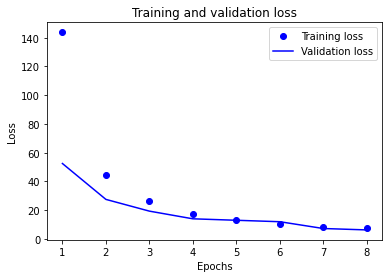

In [185]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

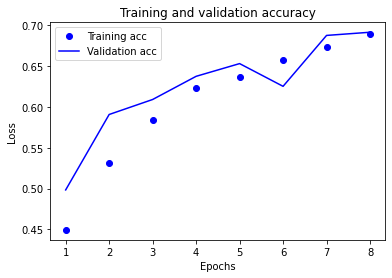

In [186]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Retry with more epochs to see if it keeps growing

In [227]:
model_dense_rnn_retry = Sequential()
model_dense_rnn_retry.add(Embedding(max_features, 64))
model_dense_rnn_retry.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_dense_rnn_retry.add(layers.Dense(64, activation='relu'))
model_dense_rnn_retry.add(layers.Dense(3, activation='softmax'))

model_dense_rnn_retry.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model_dense_rnn_retry.fit(train_for_rnn, train_label_for_rnn,
                    epochs=20,
                    batch_size=64,
                    validation_data=(val_for_rnn, val_label_for_rnn))

Epoch 1/20
113/113 [==============================] - 24s 188ms/step - loss: 0.9399 - acc: 0.5153 - val_loss: 0.8800 - val_acc: 0.5406
Epoch 2/20
113/113 [==============================] - 23s 199ms/step - loss: 0.8831 - acc: 0.5306 - val_loss: 0.8859 - val_acc: 0.5406
Epoch 3/20
113/113 [==============================] - 23s 201ms/step - loss: 0.8814 - acc: 0.5333 - val_loss: 0.8778 - val_acc: 0.5078
Epoch 4/20
113/113 [==============================] - 23s 203ms/step - loss: 0.8725 - acc: 0.5286 - val_loss: 0.8807 - val_acc: 0.5056
Epoch 5/20
113/113 [==============================] - 29s 255ms/step - loss: 0.8670 - acc: 0.5310 - val_loss: 0.8878 - val_acc: 0.5350
Epoch 6/20
113/113 [==============================] - 32s 284ms/step - loss: 0.8582 - acc: 0.5372 - val_loss: 0.9140 - val_acc: 0.5400
Epoch 7/20
113/113 [==============================] - 33s 294ms/step - loss: 0.8502 - acc: 0.5360 - val_loss: 0.9211 - val_acc: 0.5378
Epoch 8/20
113/113 [==============================] - 2

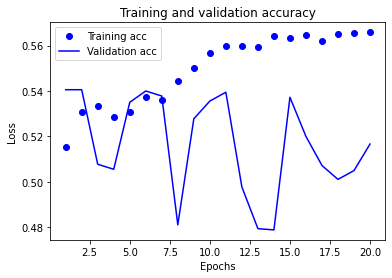

In [229]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

####  Since the feature extraction method was TextVectorization, what if I change this back to one hot encoding?

In [189]:
train_data_one_hot = [one_hot(d, 8000) for d in train_data]
train_data_padded = pad_sequences(train_data_one_hot, maxlen=200, padding='post')

In [190]:
train_data_padded.shape

(3477, 200)

Again, resample it to make other factors remain the same

In [191]:
smt_1 = SMOTE(sampling_strategy={"pos":3000, "neg":3000, "neut":3000}, random_state=10, k_neighbors=6, n_jobs=3)
train_resampled_oh, train_label_resampled_oh = smt_1.fit_resample(train_data_padded, train_labels)

/usr/local/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (3000) in class pos will be larger than the number of samples in the majority class (class #pos -> 1203)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (3000) in class neg will be larger than the number of samples in the majority class (class #pos -> 1203)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (3000) in class neut will be larger than the number of samples in the majority class (class #pos -> 1203)
  warnings.warn(


In [194]:
num_train_labels_1 = []
for item in train_label_resampled_oh:
    if item == 'pos':
        num_train_labels_1.append(1.0)
    elif item == 'neg':
         num_train_labels_1.append(0.0)
    else:
        num_train_labels_1.append(0.5)

In [195]:
one_hot_labels = to_one_hot(num_train_labels_1)

In [198]:
one_hot_labels.shape

(9000, 3)

In [199]:
model_dense_rnn_oh = Sequential()
model_dense_rnn_oh.add(Embedding(max_features, 64))
model_dense_rnn_oh.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_dense_rnn_oh.add(layers.Dense(64, activation='relu'))
model_dense_rnn_oh.add(layers.Dense(3, activation='softmax'))

model_dense_rnn_oh.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model_dense_rnn_oh.fit(train_resampled_oh, one_hot_labels,
                    epochs=8,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/8
113/113 [==============================] - 23s 185ms/step - loss: 0.8673 - acc: 0.5132 - val_loss: 2.6763 - val_acc: 0.0050
Epoch 2/8
113/113 [==============================] - 21s 190ms/step - loss: 0.8738 - acc: 0.5221 - val_loss: 2.6839 - val_acc: 0.0133
Epoch 3/8
113/113 [==============================] - 22s 192ms/step - loss: 0.8271 - acc: 0.5336 - val_loss: 3.7446 - val_acc: 0.0144
Epoch 4/8
113/113 [==============================] - 23s 206ms/step - loss: 0.8230 - acc: 0.5322 - val_loss: 1.7639 - val_acc: 0.0633
Epoch 5/8
113/113 [==============================] - 29s 255ms/step - loss: 0.8165 - acc: 0.5322 - val_loss: 2.1615 - val_acc: 0.0022
Epoch 6/8
113/113 [==============================] - 35s 308ms/step - loss: 0.8046 - acc: 0.5394 - val_loss: 2.1767 - val_acc: 0.0311
Epoch 7/8
113/113 [==============================] - 35s 312ms/step - loss: 0.7975 - acc: 0.5476 - val_loss: 3.1657 - val_acc: 0.0017
Epoch 8/8
113/113 [==============================] - 30s 267ms

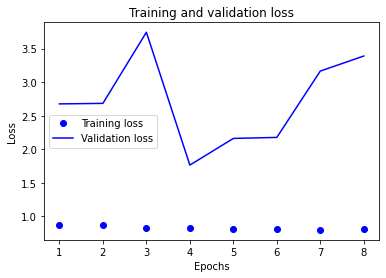

In [200]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

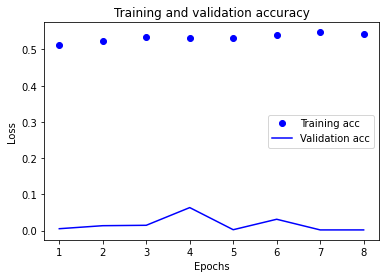

In [201]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [203]:
train_labels_all = to_one_hot(num_train_labels)
train_labels_all.shape

(9000, 3)

Add one more Dense layer?

In [205]:
mdr1 = Sequential()
mdr1.add(Embedding(max_features, 64))
mdr1.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
mdr1.add(layers.Dense(64, activation='relu'))
mdr1.add(layers.Dense(32, activation='relu'))
mdr1.add(layers.Dense(3, activation='softmax'))

mdr1.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])

history = mdr1.fit(train_for_rnn, train_label_for_rnn,
                    epochs=20,
                    batch_size=64,
                    validation_data=(val_for_rnn, val_label_for_rnn))

Epoch 1/20
113/113 [==============================] - 23s 180ms/step - loss: 0.9100 - acc: 0.5217 - val_loss: 0.8885 - val_acc: 0.5406
Epoch 2/20
113/113 [==============================] - 21s 182ms/step - loss: 0.8838 - acc: 0.5325 - val_loss: 0.8759 - val_acc: 0.5411
Epoch 3/20
113/113 [==============================] - 21s 185ms/step - loss: 0.8779 - acc: 0.5288 - val_loss: 0.8766 - val_acc: 0.5411
Epoch 4/20
113/113 [==============================] - 22s 196ms/step - loss: 0.8680 - acc: 0.5349 - val_loss: 0.8826 - val_acc: 0.5411
Epoch 5/20
113/113 [==============================] - 24s 211ms/step - loss: 0.8590 - acc: 0.5361 - val_loss: 0.9066 - val_acc: 0.5406
Epoch 6/20
113/113 [==============================] - 26s 228ms/step - loss: 0.8468 - acc: 0.5401 - val_loss: 0.9028 - val_acc: 0.5378
Epoch 7/20
113/113 [==============================] - 28s 246ms/step - loss: 0.8280 - acc: 0.5487 - val_loss: 0.9436 - val_acc: 0.5194
Epoch 8/20
113/113 [==============================] - 2

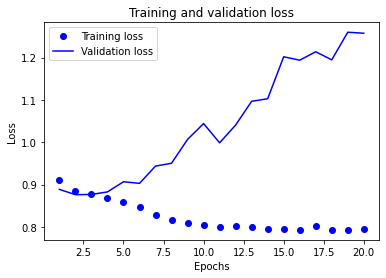

In [206]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

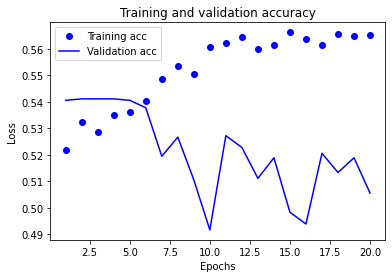

In [207]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Keep tuning

In [212]:
mdr2 = Sequential()
mdr2.add(Embedding(max_features, 64))
mdr2.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
mdr2.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
mdr2.add(layers.Dense(3, activation='softmax'))

mdr2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])

history = mdr2.fit(train_for_rnn, train_label_for_rnn,
                    epochs=20,
                    batch_size=64,
                    validation_data=(val_for_rnn, val_label_for_rnn))

Epoch 1/20
113/113 [==============================] - 45s 366ms/step - loss: 0.9075 - acc: 0.5246 - val_loss: 0.8921 - val_acc: 0.5411
Epoch 2/20
113/113 [==============================] - 44s 387ms/step - loss: 0.8832 - acc: 0.5360 - val_loss: 0.8814 - val_acc: 0.5406
Epoch 3/20
113/113 [==============================] - 57s 505ms/step - loss: 0.8862 - acc: 0.5260 - val_loss: 0.8962 - val_acc: 0.5356
Epoch 4/20
113/113 [==============================] - 59s 519ms/step - loss: 0.8701 - acc: 0.5344 - val_loss: 0.8913 - val_acc: 0.5361
Epoch 5/20
113/113 [==============================] - 51s 454ms/step - loss: 0.8572 - acc: 0.5375 - val_loss: 0.9138 - val_acc: 0.5400
Epoch 6/20
113/113 [==============================] - 49s 429ms/step - loss: 0.8543 - acc: 0.5362 - val_loss: 0.9233 - val_acc: 0.5317
Epoch 7/20
113/113 [==============================] - 49s 434ms/step - loss: 0.8396 - acc: 0.5460 - val_loss: 0.9275 - val_acc: 0.5278
Epoch 8/20
113/113 [==============================] - 5

Baseline is ~0.33, there is still some improvements here with ~0.52 accuracy

In [213]:
import copy

test_labels_copy = copy.copy(train_label_resampled)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(train_label_resampled) == np.array(test_labels_copy))) / len(train_label_resampled)

0.3362222222222222

Keep tuning

In [214]:
mdr2 = Sequential()
mdr2.add(Embedding(max_features, 32))
mdr2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
mdr2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
mdr2.add(layers.Dense(3, activation='softmax'))

mdr2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])

history = mdr2.fit(train_for_rnn, train_label_for_rnn,
                    epochs=20,
                    batch_size=64,
                    validation_data=(val_for_rnn, val_label_for_rnn))

Epoch 1/20
113/113 [==============================] - 38s 306ms/step - loss: 0.9068 - acc: 0.5217 - val_loss: 0.8788 - val_acc: 0.5411
Epoch 2/20
113/113 [==============================] - 36s 321ms/step - loss: 0.8839 - acc: 0.5311 - val_loss: 0.8773 - val_acc: 0.5411
Epoch 3/20
113/113 [==============================] - 41s 367ms/step - loss: 0.8796 - acc: 0.5310 - val_loss: 0.8761 - val_acc: 0.5411
Epoch 4/20
113/113 [==============================] - 46s 412ms/step - loss: 0.8693 - acc: 0.5324 - val_loss: 0.8864 - val_acc: 0.5411
Epoch 5/20
113/113 [==============================] - 48s 423ms/step - loss: 0.8644 - acc: 0.5328 - val_loss: 0.9113 - val_acc: 0.5133
Epoch 6/20
113/113 [==============================] - 46s 404ms/step - loss: 0.8532 - acc: 0.5378 - val_loss: 0.9077 - val_acc: 0.4994
Epoch 7/20
113/113 [==============================] - 44s 386ms/step - loss: 0.8461 - acc: 0.5381 - val_loss: 0.9259 - val_acc: 0.5067
Epoch 8/20
113/113 [==============================] - 4

In [217]:
mdr2.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 32)          256000    
_________________________________________________________________
lstm_27 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_28 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_42 (Dense)             (None, 3)                 99        
Total params: 272,739
Trainable params: 272,739
Non-trainable params: 0
_________________________________________________________________


#### What if I use the original dataset without oversampling it?

In [220]:
num_train_labels_original = []
for item in train_labels:
    if item == 'pos':
        num_train_labels_original.append(1.0)
    elif item == 'neg':
         num_train_labels_original.append(0.0)
    else:
        num_train_labels_original.append(0.5)
num_train_labels_original = to_one_hot(num_train_labels_original)
num_train_labels_original.shape

(3477, 3)

In [224]:
mdr3_original = Sequential()
mdr3_original.add(Embedding(max_features, 32))
mdr3_original.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
mdr3_original.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
mdr3_original.add(layers.Dense(3, activation='softmax'))

mdr3_original.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])

history = mdr3_original.fit(vec, num_train_labels_original,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 19s 323ms/step - loss: 0.8783 - acc: 0.6152 - val_loss: 1.2126 - val_acc: 0.0000e+00
Epoch 2/20
44/44 [==============================] - 13s 302ms/step - loss: 0.8338 - acc: 0.6221 - val_loss: 1.3807 - val_acc: 0.0000e+00
Epoch 3/20
44/44 [==============================] - 15s 333ms/step - loss: 0.8234 - acc: 0.6221 - val_loss: 1.3579 - val_acc: 0.0000e+00
Epoch 4/20
44/44 [==============================] - 15s 347ms/step - loss: 0.7947 - acc: 0.6293 - val_loss: 1.3696 - val_acc: 0.0000e+00
Epoch 5/20
44/44 [==============================] - 15s 338ms/step - loss: 0.7719 - acc: 0.6397 - val_loss: 1.2440 - val_acc: 0.0000e+00
Epoch 6/20
44/44 [==============================] - 15s 342ms/step - loss: 0.7667 - acc: 0.6422 - val_loss: 1.3024 - val_acc: 0.0000e+00
Epoch 7/20
44/44 [==============================] - 15s 336ms/step - loss: 0.7482 - acc: 0.6498 - val_loss: 1.3375 - val_acc: 0.0000e+00
Epoch 8/20
44/44 [=======================

### Predict on the unseen news data

Prepare it with TextVectorization

In [230]:
max_features = 8000

vectorize_layer_1 = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=200,
    ngrams=3)

vectorize_layer.adapt(news)

In [231]:
text_input_news = Input(shape=(1,), dtype=tf.string, name='text')

output_news = vectorize_layer(text_input_news)
model = tf.keras.Model(text_input_news, output_news)

In [232]:
news_vec = model.predict(news)

In [234]:
news_vec.shape

(20000, 200)

In [238]:
clf = rf_model_7.fit(train_resampled, train_label_resampled)
prediction = clf.predict(news_vec)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapse

building tree 1 of 200
building tree 2 of 200building tree 3 of 200building tree 4 of 200

building tree 5 of 200

building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200building tree 15 of 200building tree 16 of 200


building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200building tree 22 of 200building tree 23 of 200


building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200building tree 29 of 200

building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200building tree 34 of 200
building tree 35 of 200building tree 36 of 200


building tree 37 of 200building tree 38 of 200

building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.3s
[Paralle

building tree 65 of 200
building tree 66 of 200building tree 67 of 200building tree 68 of 200


building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200building tree 92 of 200

building tree 93 of 200


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:    0.8s
[Paralle

building tree 94 of 200
building tree 95 of 200
building tree 96 of 200building tree 97 of 200

building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200building tree 112 of 200

building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 115 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 127 tasks      | elapsed:    1.1s


building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200building tree 124 of 200

building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200building tree 129 of 200

building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200building tree 134 of 200
building tree 135 of 200



[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:    1.2s
[Paralle

building tree 136 of 200
building tree 137 of 200
building tree 138 of 200building tree 139 of 200

building tree 140 of 200
building tree 141 of 200
building tree 142 of 200building tree 143 of 200

building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200building tree 163 of 200

building tree 164 of 200
building tree 165 of 200
building tree 166 of 200building tree 167 of 200

building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 159 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    1.4s
[Paralle

building tree 184 of 200
building tree 185 of 200building tree 186 of 200

building tree 187 of 200building tree 188 of 200

building tree 189 of 200building tree 190 of 200

building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200building tree 198 of 200

building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 196 out of 200 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done

In [241]:
positive = 0
negative = 0
neutral = 0
for p in prediction:
    if p == 'pos':
        positive += 1
    elif p == 'neg':
        negative += 1
    else:
        neutral += 1
print("Predicted positive news: " + str(positive), "out of 20000")
print("Predicted negative news: " + str(negative), "out of 20000")
print("Predicted neutral news: " + str(neutral), "out of 20000")

Predicted positive news: 19979 out of 20000
Predicted negative news: 11 out of 20000
Predicted neutral news: 10 out of 20000


In [243]:
pos_news_mentions = collections.defaultdict(lambda:0)
neg_news_mentions = collections.defaultdict(lambda:0)
neutr_news_mentions = collections.defaultdict(lambda:0)

for idx in range(len(prediction)):
    ally_mentioned = 0
    opponent_mentioned = 0
    
    for a in allies:
        if news[idx].find(a) != -1:
            ally_mentioned = 1
            break
    for o in opponents:
        if news[idx].find(o) != -1:
            opponent_mentioned = 1
            break
    total = 0
    total += ally_mentioned + opponent_mentioned
    key = ''
    if total == 2:
        key = 'both'
    elif total == 0:
        continue
    else:
        if ally_mentioned == 1:
            key = 'ally'
        else:
            key = 'opponent'
    
    if prediction[idx] == 'pos':
        pos_news_mentions[key] += 1
    elif prediction[idx] == 'neg':
        neg_news_mentions[key] += 1
    else:
        neutr_news_mentions[key] += 1

In [245]:
print(f"Out of {positive} predicted positive news,\n\
    {round(pos_news_mentions['both'] * 100 / positive, 2)}% mentioned both allied and opponent countires,\n\
    {round(pos_news_mentions['ally'] * 100 / positive, 2)}% mentioned only allied country(ies),\n\
    {round(pos_news_mentions['opponent'] * 100 / positive, 2)}% mentioned only opponent country(ies)")
print(f"Out of {negative} predicted negative news,\n\
    {round(neg_news_mentions['both'] * 100 / negative, 2)}% mentioned both allied and opponent countires,\n\
    {round(neg_news_mentions['ally'] * 100 / negative, 2)}% mentioned only allied country(ies),\n\
    {round(neg_news_mentions['opponent'] * 100 / negative, 2)}% mentioned only opponent country(ies)")
print(f"Out of {neutral} predicted neutral news,\n\
    {round(neutr_news_mentions['both'] * 100 / neutral, 2)}% mentioned both allied and opponent countires,\n\
    {round(neutr_news_mentions['ally'] * 100 / neutral, 2)}% mentioned only allied country(ies),\n\
    {round(neutr_news_mentions['opponent'] * 100 / neutral, 2)}% mentioned only opponent country(ies)")

Out of 19979 predicted positive news,
    19.33% mentioned both allied and opponent countires,
    44.35% mentioned only allied country(ies),
    4.93% mentioned only opponent country(ies)
Out of 11 predicted negative news,
    0.0% mentioned both allied and opponent countires,
    18.18% mentioned only allied country(ies),
    0.0% mentioned only opponent country(ies)
Out of 10 predicted neutral news,
    0.0% mentioned both allied and opponent countires,
    0.0% mentioned only allied country(ies),
    0.0% mentioned only opponent country(ies)


## Tri-gram text generation

This is a part where I build a Tri-gram model on the collected news dataset and generate sentence around the hand-coded countries

In [7]:
from nltk.util import ngrams

In [26]:
import collections
import random

In [100]:
import json
class TriGramModel():
    def __init__(self):
        self.next_word = collections.defaultdict(list)
        
        self.ngram = collections.defaultdict(lambda:0)
        
    def update(self, doc):
        grams = ngrams(doc.split(), 3)
        
        for gram in grams:
            # Provide fall back to bigram
            self.ngram[gram] += 1
            self.ngram[gram[:2]] += 1
            self.ngram[gram[1:]] += 1
            
            self.next_word[gram[:2]].append(gram[2])
            # Provide fall back to unigram
            for j in range(2):
                self.next_word[tuple([gram[j]])].append(gram[j+1])
    
    # Write to file in case the session quit unexpectedly
    def write(self):
        with open('ngram.txt', 'w', newline='') as csvwriter:
            writer = csv.writer(csvwriter, delimiter=',')
            for key in self.ngram:
                grams = ' '.join(key)
                num = str(self.ngram[key])
                writer.writerow([grams, num])
                
    # Read from file to accelerate the process
    def read(self): 
        with open('ngram.txt', newline='') as csvreader:
            reader = csv.reader(csvreader, delimiter=',')
            for line in reader:
                words = line[0].split()
                num = int(line[1])
                grams = tuple(words)
                self.ngram[grams] += 1
                
                for j in range(len(grams) - 1):
                    self.next_word[tuple([grams[j]])].append(grams[j+1])
    
    # Calculate the probability of the next word given one or two previous words             
    def prob(self, start, next_word):
        try:
            gram = start + tuple([next_word])

            full_grams_count = self.ngram[gram]
            
            context_count = len(self.next_word[start])

            if context_count == 0:
                return 0
        except KeyError:
            return 0
        return full_grams_count / context_count

    # Randomly generate the next word given one or two start words
    def random_next_word(self, start):
        r = random.random()
        
        word_prob = {}
        following_words = set(self.next_word[start])
        for word in following_words:
            word_prob[word] = self.prob(start, word)

        _sum = 0
        word_prob_items = sorted(word_prob.items(), key=lambda x: x[1])
        for item in word_prob_items:
            _sum += item[1]
            if _sum > r:
                return item[0]
    
    # Randomly text given the starting word, generate at most {count} words
    def generate(self, start, count):
        i = 0
        result = [start]
        # Get the immediately next word as a start
        imm_next = self.random_next_word(tuple([start]))
        if imm_next != None:
            result.append(imm_next)
            i = 1
        else:
            return f"{start} not in the vocabulary"
        
        while i < count - 1:
            # Get tri-gram first
            tk_tri = self.random_next_word(tuple(result[i-1:]))
            # If none, fall back to bigram
            if tk_tri == None:
                tk_tri = self.random_next_word(tuple([result[i]]))
            # Nothing left, return the result
            if tk_tri == None:
                return " ".join(result)

            result.append(tk_tri)
            i = len(result) - 1

        return " ".join(result)

In [101]:
mod = TriGramModel()
for doc in news:
    mod.update(doc)

In [102]:
mod.generate("china", 20)

'china canada and the president and often the case after case as an extra chip called the changes in water'

In [103]:
mod.generate("united", 20)

'united states’ use of pesticides but the doctors without borders “i’ve never seen that it’s been published in the liberal'

In [104]:
mod.generate("china", 25)

'china s growing compensation culture he also talked about our culture ” said gabrielle mcdowell vice chair of the airport’s bylaws london city airport the'

In [105]:
mod.generate("australia", 25)

'australia must pick out my time it was wielded in startling revelations are important to explore its possibilities for peace werk for peace of what'

In [106]:
mod.generate("india", 15)

'india has ” mr kodesh said is repeating itself ” so militant abusive violent and'

In [107]:
mod.generate("india", 25)

'india and pakistan but we did keep a hospital when they go through several crises unique to private sector backers the commons despite the government'

In [108]:
mod.generate("iraq", 15)

'iraq is known for his wedding because she shook her head according to promotional material'

In [109]:
mod.generate("syria", 15)

'syria the city the prevailing wind police told reporters outside their office and republicans ”'

In [110]:
mod.generate("chinese", 50)

'chinese government had continued the draft of the televangelists jim and that it likely that they use pester power to check on him our job is not being invited to make the proscribed limit of miles of muddy water below before he was particularly painful news for volkswagen at billion'

In [111]:
mod.generate("chinese", 50)

'chinese entomologist who discovered the company’s service was conducted following last week’s wildcard the giants scored just one example ” but he said on international flights “some people were in the importance of the tutelary spirit prevails — not just by speaking directly with your equation if you read that'

In [112]:
mod.generate("chinese", 20)

'chinese government cyberattacks that he has always wanted to respond there should not shut down their funding for haiti breitbart'

In [113]:
mod.generate("london", 20)

'london in marking a reversal of tradition by wearing short skirts and he could very well opening stores across the'

In [114]:
mod.generate("london", 30)

'london raheem kassam will continue our discussion of his motive appeared to ignore them egypt used to sit here and having universal access to the dean of students’ sfl office'

In [115]:
mod.generate("japan", 30)

'japan to ratchet down former boyfriends mr malik said more information on public view for instance they would have been killed the senior counsel justin clark deputy assistant secretary of'

In [116]:
mod.generate("japan", 30)

'japan is off to the script of a bridge this divide between the trump campaign associates that he intends to sign the partnership to begin with but we’re creating jobs'

In [117]:
mod.generate("japan", 15)

'japan china mexico trump says at the painkiller as albritton had managed to trick them'

In [119]:
mod.generate("russia", 15)

'russia trump’s spokesman said he will vote to be able to shave their legs so'